In [1]:
import pandas as pd
from pathlib import Path
import os

In [ ]:
data_dir = Path(r"")

dfs = []
counter = 1

for file in data_dir.iterdir():
    if file.is_file() and "Turbine_Data_Kelmarsh" in file.name and file.suffix == ".csv":
        print("File:", file.name)
        
        df = pd.read_csv(
            file,
            skiprows=9,
            header=0,
            sep=",",
            encoding="utf-8",
            low_memory=False,
            on_bad_lines="skip"
        )

        df.columns = [c.lstrip("# ").strip() for c in df.columns]

        df["ID"] = f"{counter}_Kelmarsh"
        
        dfs.append(df)
        counter += 1

File: Turbine_Data_Kelmarsh_1_2020-01-01_-_2021-01-01_228.csv
File: Turbine_Data_Kelmarsh_2_2020-01-01_-_2021-01-01_229.csv
File: Turbine_Data_Kelmarsh_3_2020-01-01_-_2021-01-01_230.csv
File: Turbine_Data_Kelmarsh_4_2020-01-01_-_2021-01-01_231.csv
File: Turbine_Data_Kelmarsh_5_2020-01-01_-_2021-01-01_232.csv
File: Turbine_Data_Kelmarsh_6_2020-01-01_-_2021-01-01_233.csv


In [3]:
df = pd.concat(dfs)

In [4]:
df["ID"].value_counts()

ID
1_Kelmarsh    52704
2_Kelmarsh    52704
3_Kelmarsh    52704
4_Kelmarsh    52704
5_Kelmarsh    52704
6_Kelmarsh    52704
Name: count, dtype: int64

In [5]:
df

,Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)",ID
0,2020-01-01 00:00:00,3.887291,0.646663,2.629255,5.138163,7.1,4.390778,0.595037,2.894442,5.923776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1_Kelmarsh
1,2020-01-01 00:10:00,3.848941,0.787454,2.456995,5.551735,7.1,4.216298,0.686900,3.387660,5.713417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1_Kelmarsh
2,2020-01-01 00:20:00,4.043625,0.983279,2.726894,6.251913,7.1,4.323125,1.053373,3.305274,6.688592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1_Kelmarsh
3,2020-01-01 00:30:00,3.330342,0.689929,1.541864,4.689322,7.1,3.584192,0.524914,2.547872,4.671783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1_Kelmarsh
4,2020-01-01 00:40:00,3.388536,0.897104,1.832924,5.210185,7.1,3.668500,0.885085,1.908008,5.278419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1_Kelmarsh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52699,2020-12-31 23:10:00,3.397390,0.714660,2.083147,4.594281,7.0,3.656650,0.777789,2.365524,5.043893,...,28.757961,128.430832,5.767108,56.895752,4.571907,4.571907,0.0,24.185632,12.490830,6_Kelmarsh
52700,2020-12-31 23:20:00,3.024878,0.681220,2.062728,4.161775,7.0,3.102206,0.716219,2.021975,4.596538,...,14.246723,188.388275,8.667012,51.680893,4.298950,4.298950,0.0,46.463180,13.128132,6_Kelmarsh
52701,2020-12-31 23:30:00,3.834370,0.687778,2.755109,4.960705,7.0,3.986771,0.471164,2.756309,4.725334,...,23.547026,163.860458,6.842084,45.883919,4.383710,4.383710,0.0,43.390573,10.584705,6_Kelmarsh
52702,2020-12-31 23:40:00,4.211745,0.475226,3.123760,5.282207,7.0,4.235343,0.397805,3.239091,4.994462,...,8.373980,146.842270,7.482573,48.583969,3.951508,3.951508,0.0,39.212187,10.562059,6_Kelmarsh


In [6]:
df = df.rename(columns={"Date and time": "timestamp",
                        "Power (kW)": "target",
                        "ID": "item_id"})
cols = ["item_id", "timestamp", "target"] + [
    c for c in df.columns if c not in ["item_id", "timestamp", "target"]
]
df = df[cols]

In [7]:
df

,item_id,timestamp,target,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)",...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
0,1_Kelmarsh,2020-01-01 00:00:00,150.984141,3.887291,0.646663,2.629255,5.138163,7.1,4.390778,0.595037,...,30.390030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1_Kelmarsh,2020-01-01 00:10:00,130.414782,3.848941,0.787454,2.456995,5.551735,7.1,4.216298,0.686900,...,32.042564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1_Kelmarsh,2020-01-01 00:20:00,146.401656,4.043625,0.983279,2.726894,6.251913,7.1,4.323125,1.053373,...,32.799056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1_Kelmarsh,2020-01-01 00:30:00,84.296224,3.330342,0.689929,1.541864,4.689322,7.1,3.584192,0.524914,...,36.129912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1_Kelmarsh,2020-01-01 00:40:00,94.994105,3.388536,0.897104,1.832924,5.210185,7.1,3.668500,0.885085,...,26.667582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52699,6_Kelmarsh,2020-12-31 23:10:00,64.335619,3.397390,0.714660,2.083147,4.594281,7.0,3.656650,0.777789,...,23.282889,28.757961,128.430832,5.767108,56.895752,4.571907,4.571907,0.0,24.185632,12.490830
52700,6_Kelmarsh,2020-12-31 23:20:00,36.255348,3.024878,0.681220,2.062728,4.161775,7.0,3.102206,0.716219,...,27.599043,14.246723,188.388275,8.667012,51.680893,4.298950,4.298950,0.0,46.463180,13.128132
52701,6_Kelmarsh,2020-12-31 23:30:00,94.631310,3.834370,0.687778,2.755109,4.960705,7.0,3.986771,0.471164,...,25.812826,23.547026,163.860458,6.842084,45.883919,4.383710,4.383710,0.0,43.390573,10.584705
52702,6_Kelmarsh,2020-12-31 23:40:00,112.857855,4.211745,0.475226,3.123760,5.282207,7.0,4.235343,0.397805,...,24.626179,8.373980,146.842270,7.482573,48.583969,3.951508,3.951508,0.0,39.212187,10.562059


In [8]:
before_rows = len(df)
before_rows

316224

In [9]:
ddf = df.dropna(subset=["target"])

In [10]:
after_rows = len(ddf)
after_rows

313440

In [11]:
ddf = ddf.sort_values("timestamp")

In [12]:
ddf["timestamp"] = pd.to_datetime(ddf["timestamp"])

In [13]:
ddf["timestamp"].dtype

dtype('<M8[ns]')

In [14]:
time_diffs = ddf["timestamp"].diff().dropna()

In [15]:
expected = pd.Timedelta(minutes=10)
large_gaps = time_diffs[time_diffs > expected]

print("Anzahl Lücken > 10 min:", len(large_gaps))
print(large_gaps.sort_values(ascending=False).head(10))

Anzahl Lücken > 10 min: 26
23137   0 days 21:50:00
34216   0 days 06:50:00
38245   0 days 05:40:00
38102   0 days 05:40:00
18047   0 days 05:00:00
26431   0 days 04:20:00
26291   0 days 03:50:00
18092   0 days 03:10:00
10124   0 days 02:40:00
11557   0 days 02:30:00
Name: timestamp, dtype: timedelta64[ns]


In [16]:
ddf = ddf.sort_values(["item_id", "timestamp"])
ddf

,item_id,timestamp,target,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)",...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
0,1_Kelmarsh,2020-01-01 00:00:00,150.984141,3.887291,0.646663,2.629255,5.138163,7.1,4.390778,0.595037,...,30.390030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1_Kelmarsh,2020-01-01 00:10:00,130.414782,3.848941,0.787454,2.456995,5.551735,7.1,4.216298,0.686900,...,32.042564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1_Kelmarsh,2020-01-01 00:20:00,146.401656,4.043625,0.983279,2.726894,6.251913,7.1,4.323125,1.053373,...,32.799056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1_Kelmarsh,2020-01-01 00:30:00,84.296224,3.330342,0.689929,1.541864,4.689322,7.1,3.584192,0.524914,...,36.129912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1_Kelmarsh,2020-01-01 00:40:00,94.994105,3.388536,0.897104,1.832924,5.210185,7.1,3.668500,0.885085,...,26.667582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52699,6_Kelmarsh,2020-12-31 23:10:00,64.335619,3.397390,0.714660,2.083147,4.594281,7.0,3.656650,0.777789,...,23.282889,28.757961,128.430832,5.767108,56.895752,4.571907,4.571907,0.0,24.185632,12.490830
52700,6_Kelmarsh,2020-12-31 23:20:00,36.255348,3.024878,0.681220,2.062728,4.161775,7.0,3.102206,0.716219,...,27.599043,14.246723,188.388275,8.667012,51.680893,4.298950,4.298950,0.0,46.463180,13.128132
52701,6_Kelmarsh,2020-12-31 23:30:00,94.631310,3.834370,0.687778,2.755109,4.960705,7.0,3.986771,0.471164,...,25.812826,23.547026,163.860458,6.842084,45.883919,4.383710,4.383710,0.0,43.390573,10.584705
52702,6_Kelmarsh,2020-12-31 23:40:00,112.857855,4.211745,0.475226,3.123760,5.282207,7.0,4.235343,0.397805,...,24.626179,8.373980,146.842270,7.482573,48.583969,3.951508,3.951508,0.0,39.212187,10.562059


In [17]:
print(ddf["target"].isna().sum())     # should be 0
print(ddf["timestamp"].isna().sum())  # should be 0

0
0


In [18]:
def drop_empty_and_useless_columns(df):
    n_unique = df.nunique(dropna=True)
    cols_to_drop = n_unique[n_unique <= 1].index.tolist()
    result_df = df.copy()
    result_df = result_df.drop(columns=cols_to_drop)

    print(cols_to_drop)

    return result_df

In [19]:
def drop_columns_by_nan_percentage(df, nan_threshold):
    row_count = len(df.index)
    nan_ratio = df.isna().sum() / row_count
    cols_to_drop = nan_ratio[nan_ratio >= nan_threshold].index.tolist()

    # Create cleaned DataFrame without empty columns
    result_df = df.copy()
    result_df = result_df.drop(columns=cols_to_drop)

    return result_df

In [20]:
len(ddf.keys())

300

In [21]:
sdf = drop_columns_by_nan_percentage(drop_empty_and_useless_columns(ddf), 0.7)
len(sdf.keys())

['Lost Production to Curtailment (Total) (kWh)', 'Lost Production to Curtailment (Grid) (kWh)', 'Lost Production to Curtailment (Noise) (kWh)', 'Lost Production to Curtailment (Shadow) (kWh)', 'Lost Production to Curtailment (Bats) (kWh)', 'Lost Production to Curtailment (Birds) (kWh)', 'Lost Production to Curtailment (Ice) (kWh)', 'Lost Production to Curtailment (Sector Management) (kWh)', 'Lost Production to Curtailment (Technical) (kWh)', 'Lost Production to Curtailment (Marketing) (kWh)', 'Lost Production to Curtailment (Boat Action) (kWh)', 'Compensated Lost Production (kWh)', 'Lost Production to Curtailment (Grid Constraint) (kWh)', 'Lost Production (Contractual Global) (kWh)', 'Lost Production (Contractual Custom) (kWh)', 'Potential power met mast anemometer (kW)', 'Potential power estimated (kW)', 'Potential power met mast anemometer MPC (kW)', 'Available Capacity for Production (Planned) (kW)', 'Time-based System Avail. (Planned)', 'Time-based Contractual Avail. (Global)', 'Ti

273

In [22]:
import sys
import os

cwd = os.getcwd()
project_root = os.path.abspath(os.path.join(cwd, "..", "..", ".."))
module_path = os.path.join(project_root, "src", "sdk", "python")

if module_path not in sys.path:
    sys.path.append(module_path)

In [24]:
import rtdip_sdk.pipelines.data_quality.data_manipulation.pandas.datetime_features as dt_features
import rtdip_sdk.pipelines.data_quality.data_manipulation.pandas.mad_outlier_detection as mod
import rtdip_sdk.pipelines.data_quality.data_manipulation.pandas.lag_features as lf
import rtdip_sdk.pipelines.data_quality.data_manipulation.pandas.rolling_statistics as rs


c:\Users\ReneJ\anaconda3\envs\BachelorThesis310\lib\site-packages\pyspark\pandas\__init__.py:43: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [25]:
datetime_f = dt_features.DatetimeFeatures(sdf, "timestamp")
result_df = datetime_f.apply()
len(result_df.keys())

277

In [26]:
roller = rs.RollingStatistics(df=result_df, value_column="target", group_columns=["item_id"], windows=[3], statistics=['mean', 'std'])
result_df2 = roller.apply()

In [27]:
lag_creator = lf.LagFeatures(
        result_df2,
        value_column='target',
        group_columns=['item_id'],
        lags=[1, 2, 3]
    )
result_df2 = lag_creator.apply()

In [28]:
len(result_df2.keys())

282

In [29]:
result_df2

,item_id,timestamp,target,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)",...,"Tower Acceleration Y, StdDev (mm/ss)",year,month,day,weekday,rolling_mean_3,rolling_std_3,lag_1,lag_2,lag_3
0,1_Kelmarsh,2020-01-01 00:00:00,150.984141,3.887291,0.646663,2.629255,5.138163,7.1,4.390778,0.595037,...,NaN,2020,1,1,2,150.984141,NaN,NaN,NaN,NaN
1,1_Kelmarsh,2020-01-01 00:10:00,130.414782,3.848941,0.787454,2.456995,5.551735,7.1,4.216298,0.686900,...,NaN,2020,1,1,2,140.699461,14.544733,150.984141,NaN,NaN
2,1_Kelmarsh,2020-01-01 00:20:00,146.401656,4.043625,0.983279,2.726894,6.251913,7.1,4.323125,1.053373,...,NaN,2020,1,1,2,142.600193,10.798749,130.414782,150.984141,NaN
3,1_Kelmarsh,2020-01-01 00:30:00,84.296224,3.330342,0.689929,1.541864,4.689322,7.1,3.584192,0.524914,...,NaN,2020,1,1,2,120.370887,32.247962,146.401656,130.414782,150.984141
4,1_Kelmarsh,2020-01-01 00:40:00,94.994105,3.388536,0.897104,1.832924,5.210185,7.1,3.668500,0.885085,...,NaN,2020,1,1,2,108.563995,33.202072,84.296224,146.401656,130.414782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52699,6_Kelmarsh,2020-12-31 23:10:00,64.335619,3.397390,0.714660,2.083147,4.594281,7.0,3.656650,0.777789,...,12.490830,2020,12,31,3,72.341817,10.717570,68.172284,84.517547,133.967656
52700,6_Kelmarsh,2020-12-31 23:20:00,36.255348,3.024878,0.681220,2.062728,4.161775,7.0,3.102206,0.716219,...,13.128132,2020,12,31,3,56.254417,17.425615,64.335619,68.172284,84.517547
52701,6_Kelmarsh,2020-12-31 23:30:00,94.631310,3.834370,0.687778,2.755109,4.960705,7.0,3.986771,0.471164,...,10.584705,2020,12,31,3,65.074093,29.194986,36.255348,64.335619,68.172284
52702,6_Kelmarsh,2020-12-31 23:40:00,112.857855,4.211745,0.475226,3.123760,5.282207,7.0,4.235343,0.397805,...,10.562059,2020,12,31,3,81.248171,40.016463,94.631310,36.255348,64.335619


In [30]:
corr = result_df2.select_dtypes(include='number').corr()

In [31]:
corr["target"]

target                                  1.000000
Wind speed (m/s)                        0.921134
Wind speed, Standard deviation (m/s)    0.697438
Wind speed, Minimum (m/s)               0.884817
Wind speed, Maximum (m/s)               0.900461
                                          ...   
rolling_mean_3                          0.986327
rolling_std_3                           0.314130
lag_1                                   0.972693
lag_2                                   0.952532
lag_3                                   0.938454
Name: target, Length: 280, dtype: float64

In [32]:
target_corr = corr["target"].sort_values(ascending=False)
target_corr

target                        1.000000
Apparent power (kVA)          0.999201
Grid current (A)              0.998992
Current L3 / W (A)            0.998982
Current L2 / V (A)            0.998947
                                ...   
Power factor (cosphi), Max   -0.568509
Reactive power, Min (kvar)   -0.931492
Reactive power, Max (kvar)   -0.949778
Reactive power (kvar)        -0.955674
year                               NaN
Name: target, Length: 280, dtype: float64

In [33]:
filtered_corr = target_corr[target_corr.abs() > 0.6]
filtered_corr

target                                1.000000
Apparent power (kVA)                  0.999201
Grid current (A)                      0.998992
Current L3 / W (A)                    0.998982
Current L2 / V (A)                    0.998947
                                        ...   
Temperature motor axis 1, Min (°C)    0.603913
Temperature motor axis 2, Min (°C)    0.600703
Reactive power, Min (kvar)           -0.931492
Reactive power, Max (kvar)           -0.949778
Reactive power (kvar)                -0.955674
Name: target, Length: 96, dtype: float64

In [34]:
columns_to_keep = ["item_id", "timestamp"]
columns_to_keep.extend(filtered_corr.keys())
result_df3 = result_df2[columns_to_keep]

In [35]:
result_df3

,item_id,timestamp,target,Apparent power (kVA),Grid current (A),Current L3 / W (A),Current L2 / V (A),Current L1 / U (A),rolling_mean_3,Equivalent Full Load Hours (s),...,"Motor current axis 3, StdDev (A)","Motor current axis 1, StdDev (A)","Motor current axis 2, StdDev (A)","Front bearing temperature, Min (°C)","Temperature motor axis 3, Min (°C)","Temperature motor axis 1, Min (°C)","Temperature motor axis 2, Min (°C)","Reactive power, Min (kvar)","Reactive power, Max (kvar)",Reactive power (kvar)
0,1_Kelmarsh,2020-01-01 00:00:00,150.984141,191.595424,163.090749,159.327250,168.015999,161.857750,150.984141,43.902439,...,NaN,NaN,NaN,64.949997,NaN,NaN,NaN,-138.632645,-99.226242,-116.009365
1,1_Kelmarsh,2020-01-01 00:10:00,130.414782,159.075412,136.410085,132.960500,141.599501,134.392750,140.699461,43.902439,...,NaN,NaN,NaN,64.300003,NaN,NaN,NaN,-106.268532,-76.091858,-89.322076
2,1_Kelmarsh,2020-01-01 00:20:00,146.401656,169.771663,148.822499,145.483502,154.263749,146.404500,142.600193,40.390244,...,NaN,NaN,NaN,64.300003,NaN,NaN,NaN,-102.779442,-60.502048,-81.990830
3,1_Kelmarsh,2020-01-01 00:30:00,84.296224,104.449172,89.949833,88.326249,93.476250,86.615751,120.370887,24.585366,...,NaN,NaN,NaN,62.200001,NaN,NaN,NaN,-71.621071,-46.480900,-55.850379
4,1_Kelmarsh,2020-01-01 00:40:00,94.994105,116.195068,101.971083,99.737500,105.856251,99.436500,108.563995,28.097561,...,NaN,NaN,NaN,61.250000,NaN,NaN,NaN,-76.412048,-45.029530,-59.044577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52699,6_Kelmarsh,2020-12-31 23:10:00,64.335619,176.983041,152.870168,152.732500,155.898000,149.948499,72.341817,15.804878,...,1.714109,1.453526,2.066478,57.099998,39.000000,39.0,40.0,-170.826050,-158.725616,-162.909205
52700,6_Kelmarsh,2020-12-31 23:20:00,36.255348,177.280415,150.400085,149.811001,152.396999,147.943750,56.254417,12.292683,...,0.801116,0.540127,1.294236,55.950001,36.000000,37.0,38.0,-184.025818,-161.809738,-171.107988
52701,6_Kelmarsh,2020-12-31 23:30:00,94.631310,194.675916,167.434916,167.459502,171.813999,163.793000,65.074093,28.097561,...,1.262534,1.395692,1.528034,56.049999,35.000000,36.0,37.0,-176.588470,-161.905807,-168.515520
52702,6_Kelmarsh,2020-12-31 23:40:00,112.857855,202.369426,173.078001,172.092749,178.390750,169.119998,81.248171,29.853659,...,0.580056,1.244935,1.497079,57.799999,50.080002,52.0,51.0,-182.275940,-156.196533,-167.382320


In [36]:
print("target min: " + str(result_df3["target"].min()))
print("target max: " + str(result_df3["target"].max()))

target min: -16.781886625289914
target max: 2082.63975765831


<Axes: title={'center': 'Target Distribution'}, ylabel='Frequency'>

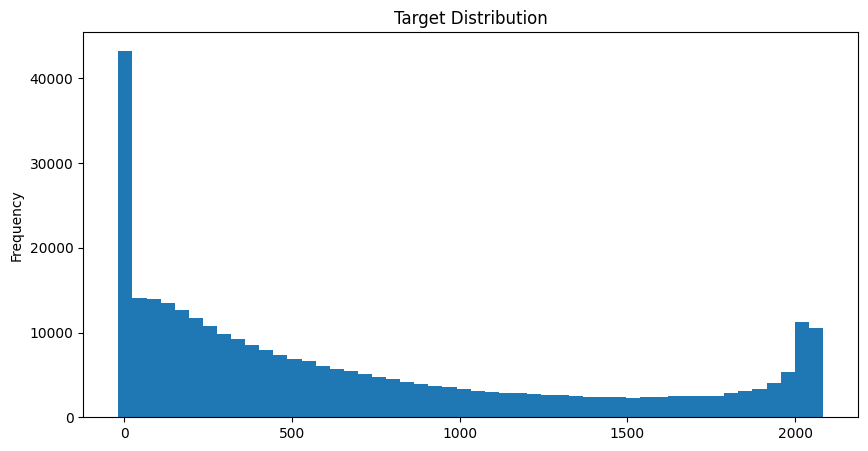

In [37]:
df["target"].plot(kind="hist", bins=50, figsize=(10,5), title="Target Distribution")


In [38]:
result_df3.to_parquet(
    "scada_prepro.parquet",
    engine="pyarrow",
    coerce_timestamps="us",   # "us" = microseconds, "ms" = milliseconds
    allow_truncated_timestamps=True
)
